In [1]:
 # BigMart Sales - Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("BigMart_Cleaned.csv")

In [4]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

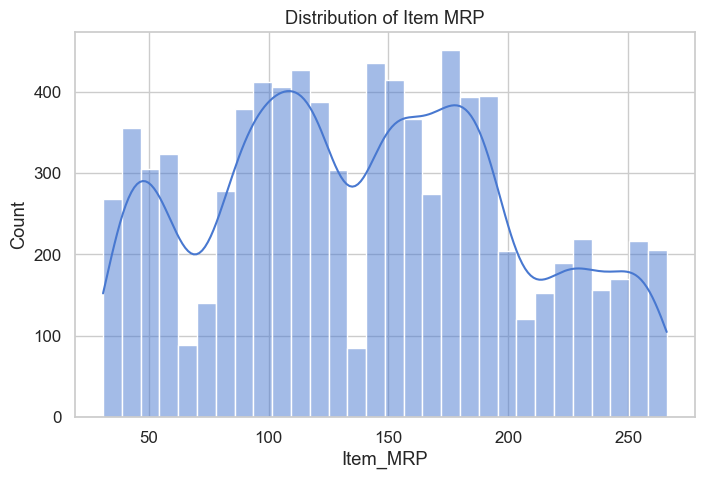

In [5]:
#UNIVARIATE ANALYSIS
# Histogram - Item MRP
plt.figure(figsize=(8,5))
sns.histplot(df['Item_MRP'], bins=30, kde=True)
plt.title("Distribution of Item MRP")
plt.show()

In [6]:
#The Item_MRP distribution shows four distinct price bands rather than a smooth spread.
#The most common price band lies in the mid-range (around ₹120–₹160), indicating mid-priced products dominate the inventory

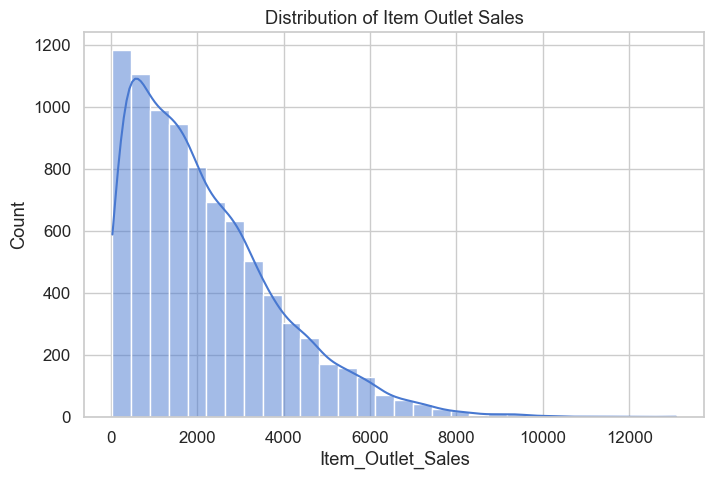

In [7]:
# Histogram - Item Outlet Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item Outlet Sales")
plt.show()

In [8]:
#Sales are right-skewed, most items sell below ~4000, with few high-selling items driving revenue.

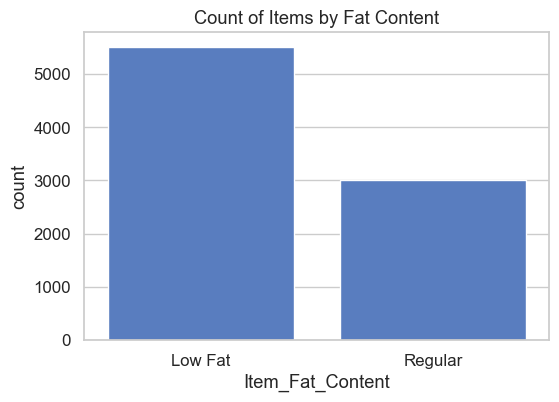

In [9]:
# Countplot - Fat Content
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content', data=df)
plt.title("Count of Items by Fat Content")
plt.show()

In [10]:
# Low Fat products are slightly more common than Regular products.
#Low Fat – the majority of products fall into this category.
#Regular – a smaller but still significant share.
#The higher number of low-fat products might indicate a health-conscious product, possibly targeting customers with dietary preferences.


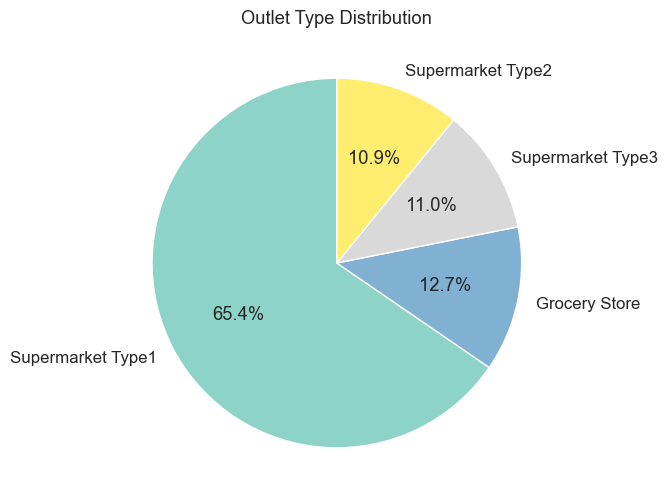

In [11]:
# Pie Chart - Outlet Type
plt.figure(figsize=(6,6))
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Outlet Type Distribution")
plt.ylabel("")
plt.show()

In [12]:
#Most outlets are Supermarket Type1, indicating a heavy reliance on smaller-format supermarkets.

C:\Users\vrnsj\AppData\Local\Temp\ipykernel_3928\2540162575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlet_sales.index, y=outlet_sales.values, palette="viridis")


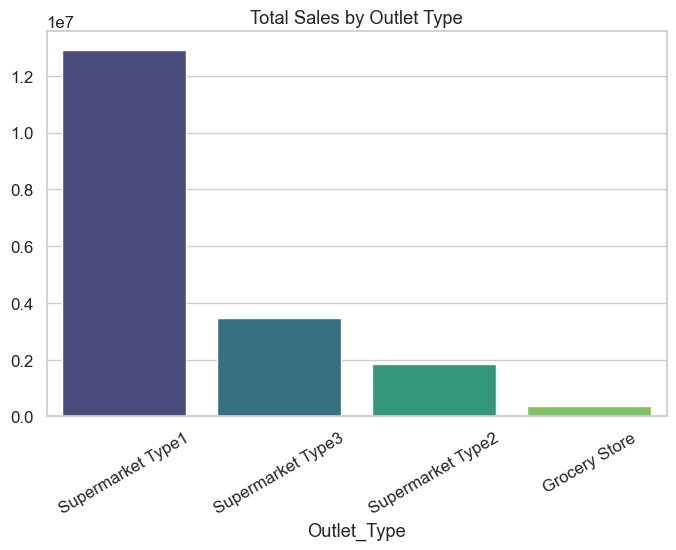

In [13]:
#BIVARIATE ANALYSIS

# Bar chart - Outlet Type vs Total Sales
plt.figure(figsize=(8,5))
outlet_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=outlet_sales.index, y=outlet_sales.values, palette="viridis")
plt.title("Total Sales by Outlet Type")
plt.xticks(rotation=30)
plt.show()

In [14]:
#Supermarket Type 1 dominates total sales, indicating that this format is the most commercially successful, possibly due to wider product variety or better customer reach. 
#Supermarket Type 3 also performs strongly, suggesting it attracts a sizable customer base despite fewer numbers. 
#In contrast, Grocery Stores contribute the least, pointing toward limited product ranges or lower ticket sizes.


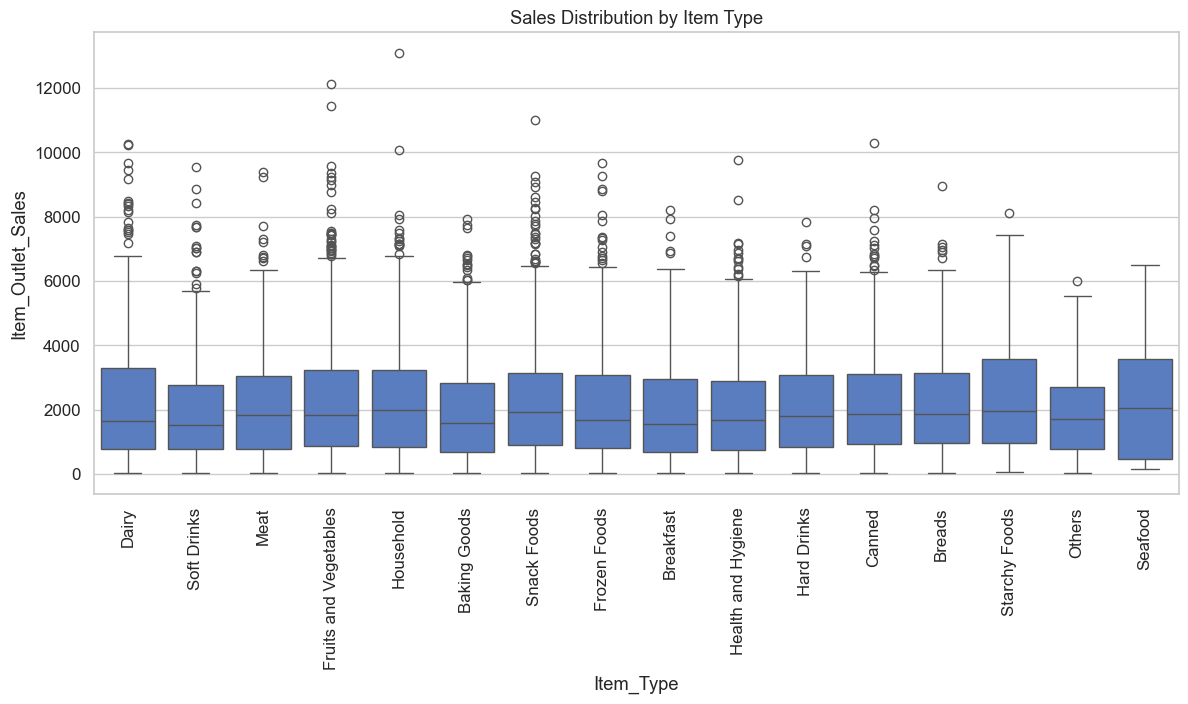

In [15]:
# Boxplot - Item Type vs Sales
plt.figure(figsize=(14,6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title("Sales Distribution by Item Type")
plt.xticks(rotation=90)
plt.show()

In [16]:
#Categories like Fruits & Vegetables, Snack Foods, and Household have higher median sales; Seafood shows lowest sales.

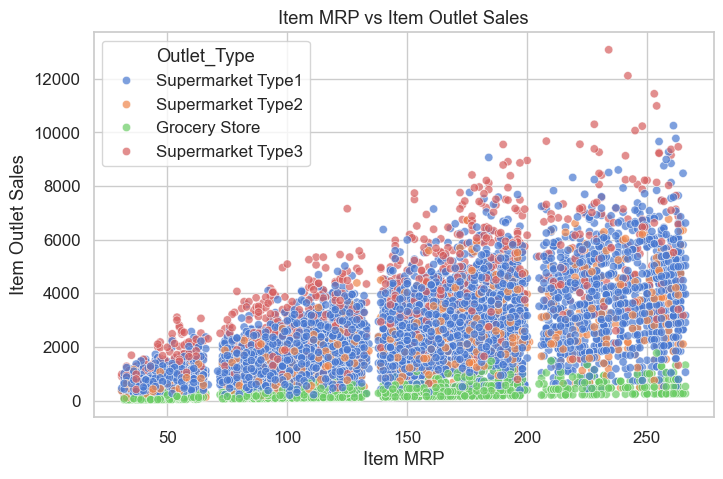

In [26]:
#SCATTER PLOT: Item_MRP vs Item_Outlet_Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Type", data=df, alpha=0.7)
plt.title("Item MRP vs Item Outlet Sales")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.show()

In [27]:
# Higher MRP items tend to have higher sales, with noticeable price clusters.
#Sales generally increase with higher MRP, especially in premium price clusters. 
#However, some low-MRP items also achieve high sales, likely due to high volume demand

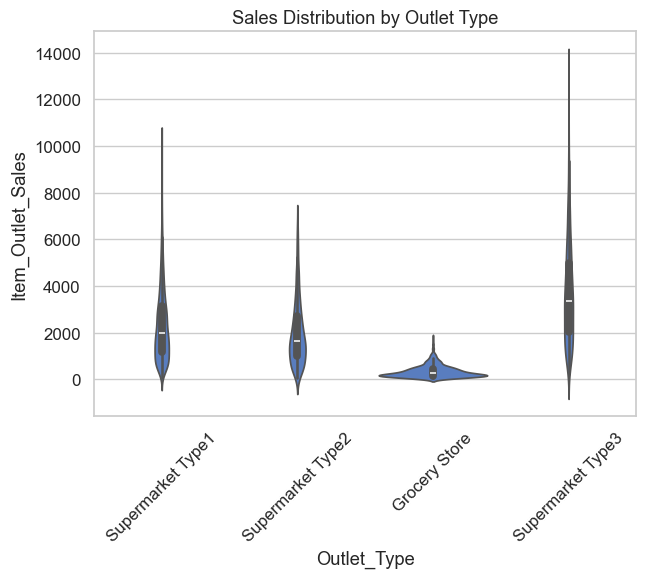

In [29]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title("Sales Distribution by Outlet Type")
plt.xticks(rotation=45)
plt.show()

In [30]:
#Supermarket Type 3 usually shows the highest sales values with a dense concentration at the top end.
#Grocery Stores often have lower and more concentrated sales, with less variation.
#Supermarket Type 1 & 2 lie in between, showing moderate median sales but still with variability.

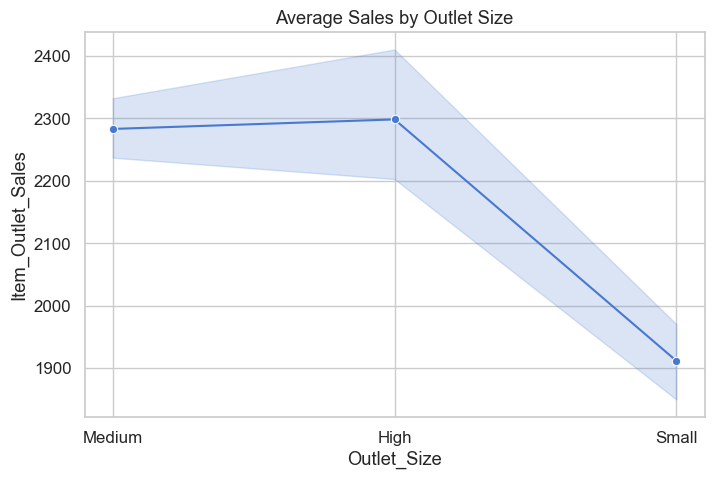

In [44]:
#line chart
plt.figure(figsize=(8,5))
sns.lineplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, estimator='mean', marker="o")
plt.title("Average Sales by Outlet Size")
plt.show()


In [43]:
#Larger outlets tend to generate higher sales compared to small outlets, highlighting the role of store capacity.

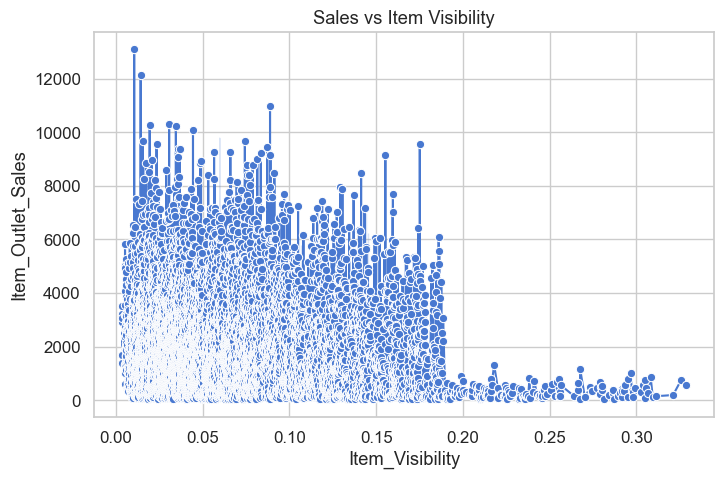

In [45]:
# Sort by visibility for a smoother curve
plt.figure(figsize=(8,5))
sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, marker="o")
plt.title("Sales vs Item Visibility")
plt.show()


In [46]:
#At very low visibility, sales are often higher,
#extreme visibility sometimes correlates with reduced sales (possibly discounted/clearance items).

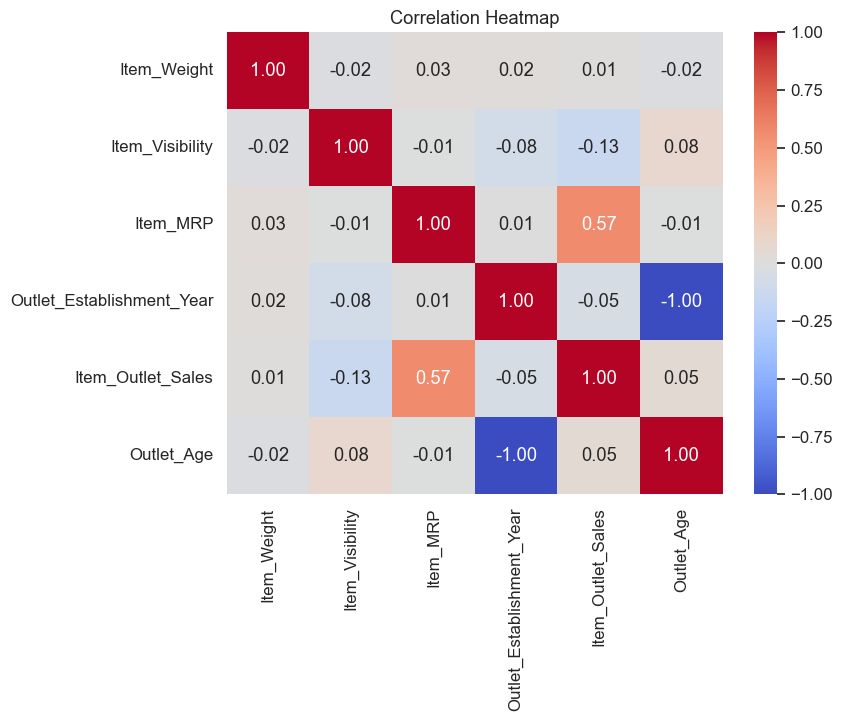

In [40]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#multivariate
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [33]:
#Item MRP shows a moderate positive correlation with sales.
#Higher-priced items (Item_MRP) are more likely to have higher sales, while other factors like weight and visibility show minimal impact.

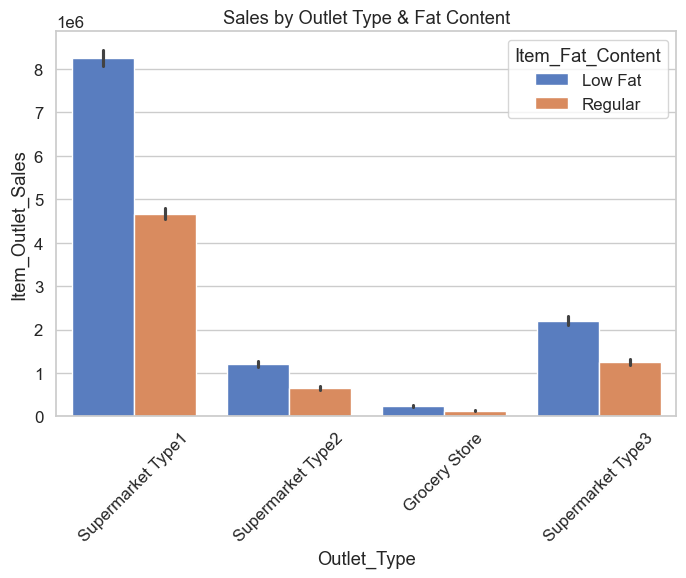

In [34]:
#  Sales by Outlet Type & Fat Content (Grouped Bar)
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df, estimator=sum)
plt.title("Sales by Outlet Type & Fat Content")
plt.xticks(rotation=45)
plt.show()

In [35]:
#Supermarket Type 3 dominates sales for both Low Fat and Regular items.
#In Grocery Stores, sales remain low regardless of fat content.

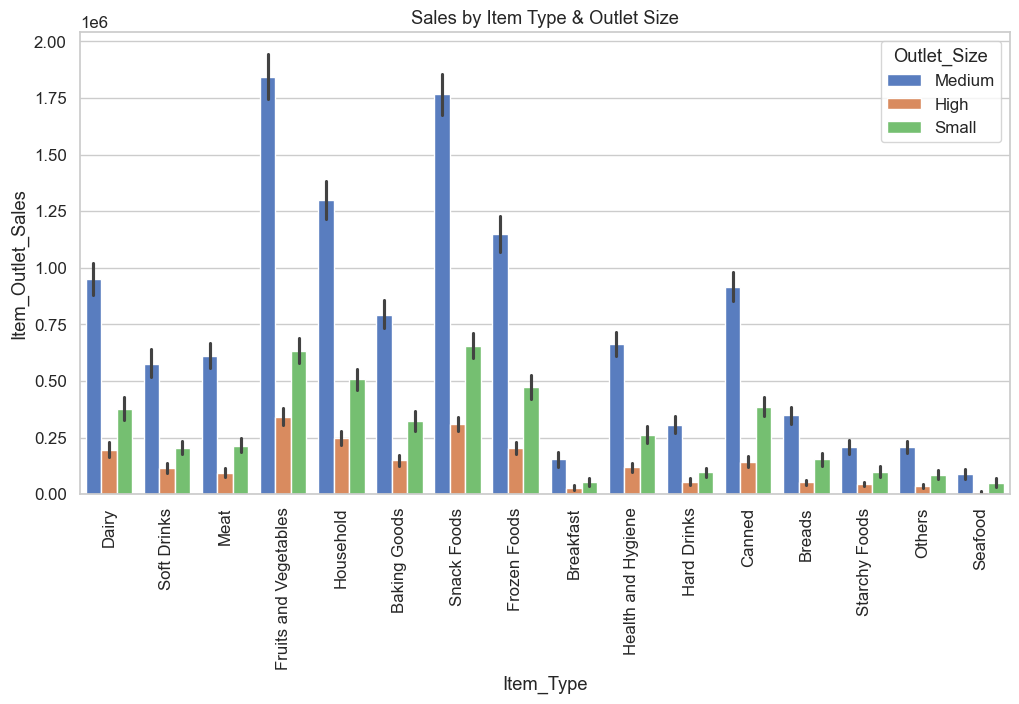

In [36]:
# . Sales by Item Type & Outlet Size (Grouped Bar)
plt.figure(figsize=(12,6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=df, estimator=sum)
plt.title("Sales by Item Type & Outlet Size")
plt.xticks(rotation=90)
plt.show()


In [37]:
#Larger outlets (High Outlet Size) consistently record higher sales across almost all item types.
#Certain categories like Fruits & Vegetables, Snack Foods, and Household Items contribute the most sales.
#Smaller outlets struggle to generate comparable sales, showing a clear scale advantage for bigger outlets.

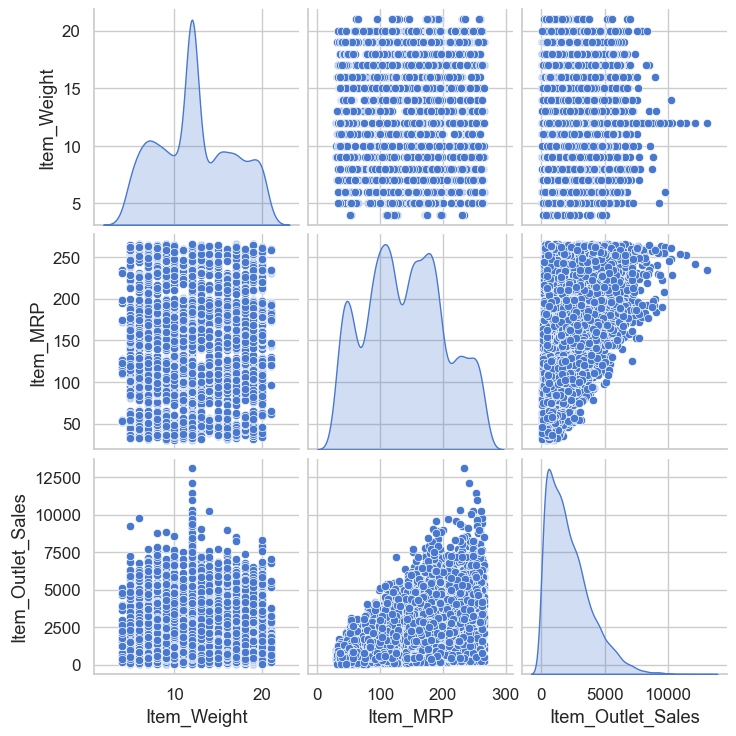

In [38]:
#  Pairplot - Numeric features
sns.pairplot(df[['Item_Weight','Item_MRP','Item_Outlet_Sales']], diag_kind='kde')
plt.show()

In [39]:
#Clear positive trend between Item_MRP and Item_Outlet_Sales.
#Item_Weight shows no visible relationship with sales.
#Data points suggest that price (MRP) is a much stronger predictor of sales than weight.